In [4]:
import pandas as pd 
import seaborn as sns
df = pd.read_csv('downloads/hotel_booking.csv')
import matplotlib.pyplot as plt

In [5]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


# Reading Data

In [4]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

,distribution_channel
0,Direct
1,Direct
2,Direct
3,Corporate
4,TA/TO
...,...
119385,TA/TO
119386,TA/TO
119387,TA/TO
119388,TA/TO


#### Duplicate the dataframe

In [7]:
df1 = df.copy()

# Cleaning+Analysing Data
1. Replacing null values with another value
2. Top 5 agents
3. Top 5 countries 
4. Removed outlier in ADR, 5400 is an unrealistic number and when excluded the next number is 510
5. Convert reservation status's data type object to Date

In [12]:
df1['children'].fillna(0,inplace=True)

In [19]:
df1['company'].replace('Others', 0, inplace=True)

In [6]:
df1['agent'].fillna(0, inplace=True)

In [22]:
df1['country'].fillna('Other', inplace=True)

In [24]:
df1.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [38]:
df1.groupby(df1['agent', ]).size().sort_values(ascending=False).nlargest(5)

agent
9.0      31961
0.0      16340
240.0    13922
1.0       7191
14.0      3640
dtype: int64

In [26]:
df1.groupby(df1['country']).size().sort_values(ascending=False).nlargest(10)


country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
dtype: int64

In [27]:
df1['reservation_status_date'] = pd.to_datetime(df1['reservation_status_date'])

In [49]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [54]:
df1 = df1[df1['adr']<5400]

# Univariate Analysis
1. Hotel Vs Resort Popularity
2. The most popular months throughout the years
3. Cancelation vs Non-cancelation rates

Text(0.5, 1.0, 'Hotel Vs Resort Popularity')

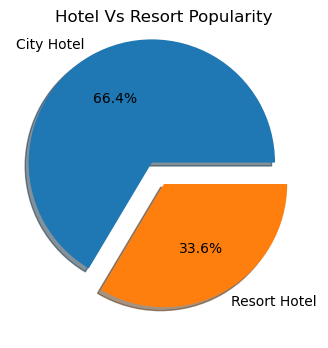

In [77]:
data = df1['hotel'].value_counts()
plt.figure(figsize=(5,4))
plt.pie(data, labels=data.index, autopct='%1.1f%%', explode=[0.2, 0], shadow=True)
plt.title('Hotel Vs Resort Popularity')

Text(0.5, 1.0, 'Most popular months')

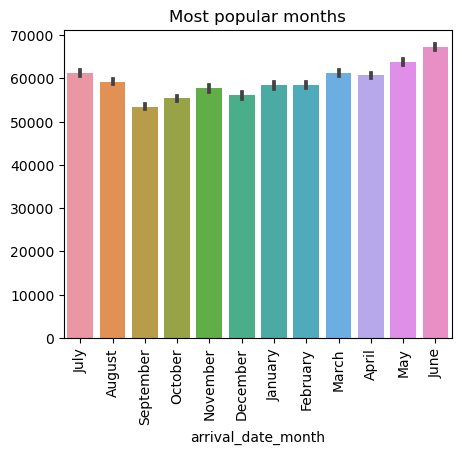

In [78]:
plt.figure(figsize=(5,4))
sns.barplot(x=df['arrival_date_month'], y=df['arrival_date_month'].index)
plt.xticks(rotation=90)
plt.title('Most popular months')

Text(0.5, 1.0, 'Canceled vs Not Canceled Bookings')

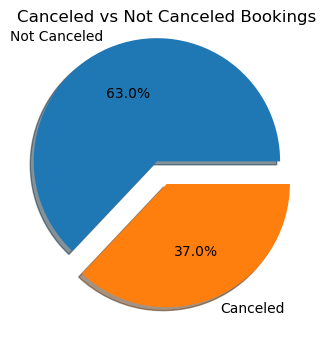

In [76]:
plt.figure(figsize=(5,4))
data = df['is_canceled'].value_counts()
plt.pie(data, labels=['Not Canceled', 'Canceled'], autopct='%1.1f%%', explode=[0.2,0], shadow=True)
plt.title("Canceled vs Not Canceled Bookings")

# Bivariate and Multivariate Analysis
1. Hotel type cancelation rate
2. Market segment cancelation rate
3. Top 10 countries where most cancelations occur
4. Reservation status for each month

[Text(0, 0, 'Not Canceled'), Text(1, 0, 'Canceled')]

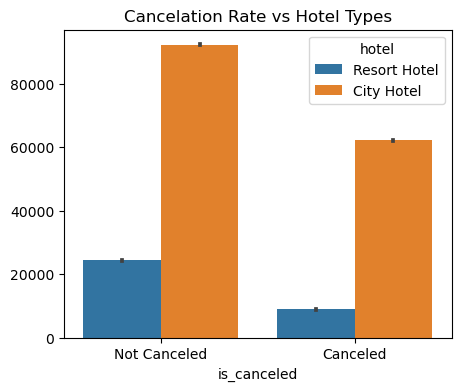

In [92]:
plt.figure(figsize=(5,4))
ax = sns.barplot(x=df1["is_canceled"], y=df1['is_canceled'].index, hue=df["hotel"])
plt.title('Cancelation Rate vs Hotel Types')
ax.set_xticklabels(['Not Canceled', 'Canceled'])

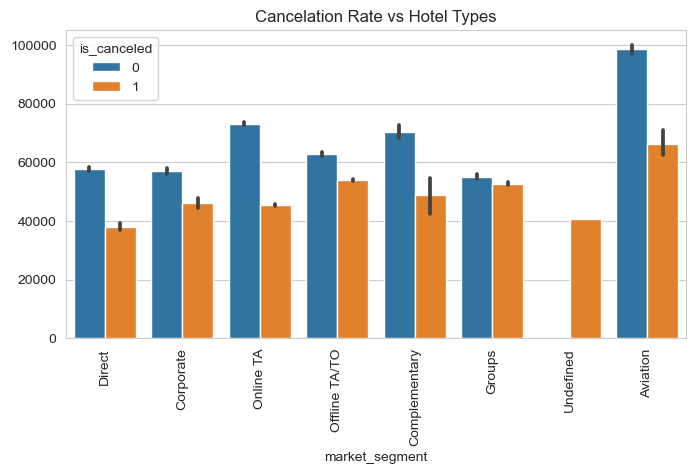

In [16]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x=df1["market_segment"], y=df1['is_canceled'].index, hue=df["is_canceled"])
sns.set_style("whitegrid")
plt.title('Cancelation Rate vs Hotel Types')
plt.tick_params(axis='x', rotation=90)

([<matplotlib.patches.Wedge at 0x1432f8aac10>,
 [Text(-0.6486479706231275, 0.8884007036278723, 'PRT'),
  Text(-0.12429436280215385, -1.0929551277960163, 'GBR'),
  Text(0.2797610009026121, -1.0638297713327864, 'ESP'),
  Text(0.6083579436571936, -0.9164609170003873, 'FRA'),
  Text(0.8245010439701849, -0.7281469827528474, 'ITA'),
  Text(0.954958661809011, -0.5459431785780853, 'DEU'),
  Text(1.0312772570969826, -0.38271035914190277, 'IRL'),
  Text(1.0729095093498013, -0.24262148451192195, 'BRA'),
  Text(1.0926181033926405, -0.12722295444875134, 'USA'),
  Text(1.0992092846107648, -0.04170070293760958, 'BEL')])

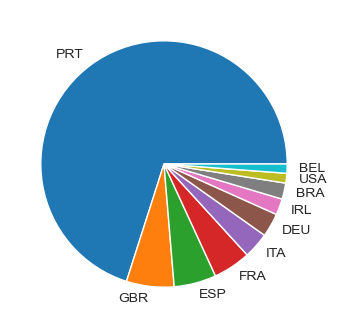

In [25]:
plt.figure(figsize=(5,4))
top10_canceled = df1[df1['is_canceled']==1].groupby('country').size().nlargest(10)
plt.pie(top10_canceled, labels=top10_canceled.index)